Import Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
import plotly.express as px

plt.style.use('seaborn-white')
sns.set_style('whitegrid')
sns.despine()

<Figure size 432x288 with 0 Axes>

Import Dataset

In [2]:
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transtrain = pd.read_csv('transactions_train.csv')

Articles Overview

In [3]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [4]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [5]:
print(f"Dataframe articles has {len(articles)} rows and {len(articles.columns)} columns")

Dataframe articles has 105542 rows and 25 columns


In [6]:
df_article = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'colour_group_name', 'index_name']]
df_article.head(2)

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear


Transcation Overview

In [7]:
transtrain.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [8]:
transtrain.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')

In [9]:
print(f"Datafram transcations has {len(transtrain)} rows and {len(transtrain.columns)} columns")

Datafram transcations has 31788324 rows and 5 columns


In [10]:
sales_by_date = transtrain.groupby(['t_dat'])['price'].sum().reset_index()

In [11]:
fig = px.line(sales_by_date,x='t_dat',y='price',title = 'Yearly Sales')
fig.show()

Sep 28, 2019 has the highest yearly sales of 6161. 

In [12]:
df_tran = transtrain[['customer_id','article_id','price']]
df_tran.head(2)

,customer_id,article_id,price
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492


Transcations Analysis

In [13]:
df_soldquantity = df_tran['article_id'].value_counts()
df_soldquantity

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [14]:
df_soldquantity=df_soldquantity.reset_index()
df_soldquantity=df_soldquantity.rename(columns={"article_id":"sold_qty","index" : "article_id"})
df_soldquantity.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [15]:
#Summary of sold_quantity
df_soldquantity['sold_qty'].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

1. There are 104547 different articles in the transcations
2. There are items only sold once
3. 25% of products have been sold less than 14 times
4. 75% of products have been sold less than 286 times
5. The most sold item have been sold 50287 times. 

Which are the top50 popular products in terms of their sold quantity?

In [16]:
top_50_sold = df_soldquantity.iloc[:50]
top_50_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [17]:
top_50_details = sqldf("""
                            SELECT * 
                            FROM top_50_sold AS t
                            INNER JOIN df_article AS a
                            ON t.article_id = a.article_id
                            """)

top_50_details.head()

,article_id,sold_qty,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,35043,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,372860001,31718,372860001,7p Basic Shaftless,Socks,Socks & Tights,Black,Lingeries/Tights
3,610776002,30199,610776002,Tilly (1),T-shirt,Garment Upper body,Black,Ladieswear
4,759871002,26329,759871002,Tilda tank,Vest top,Garment Upper body,Black,Divided


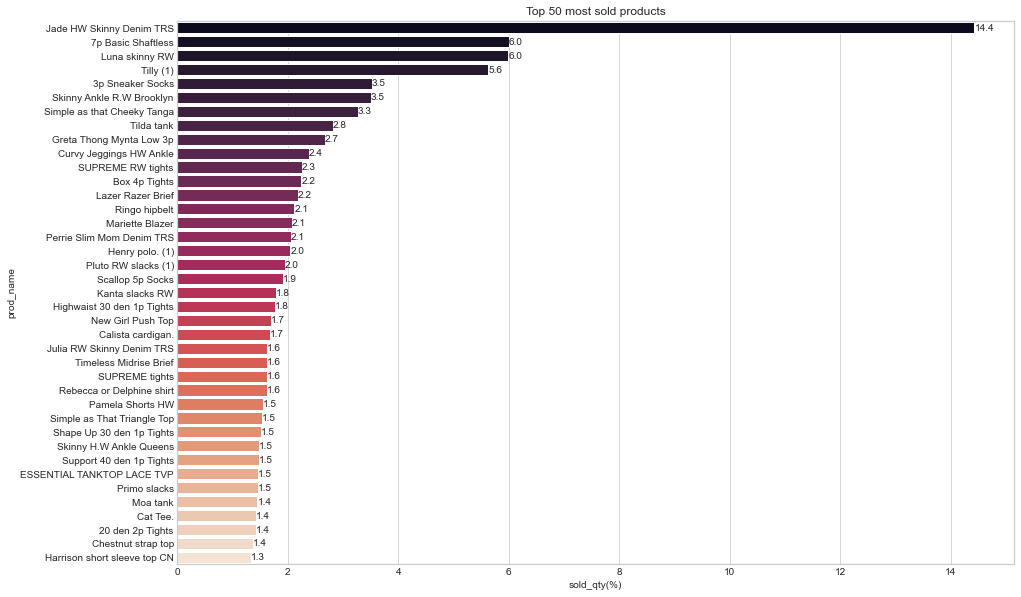

In [18]:
plt.figure(figsize=(15,10))
plt.title("Top 50 most sold products")
b=sns.barplot(y="prod_name",x="sold_qty(%)",data=top_50_details.groupby("prod_name")["sold_qty"].sum().transform(lambda x:(x/x.sum()*100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)",ascending=False),palette="rocket")
for container in b.containers:
    b.bar_label(container,fmt='%.1f',fontsize=10)
plt.show()

1. The trousers "Jade HW Skinny Denim TRS" is responsible for almost 15% of all sold products.
2. The Top6 of most sold items produce almost 40% of the top 50 sold products. 

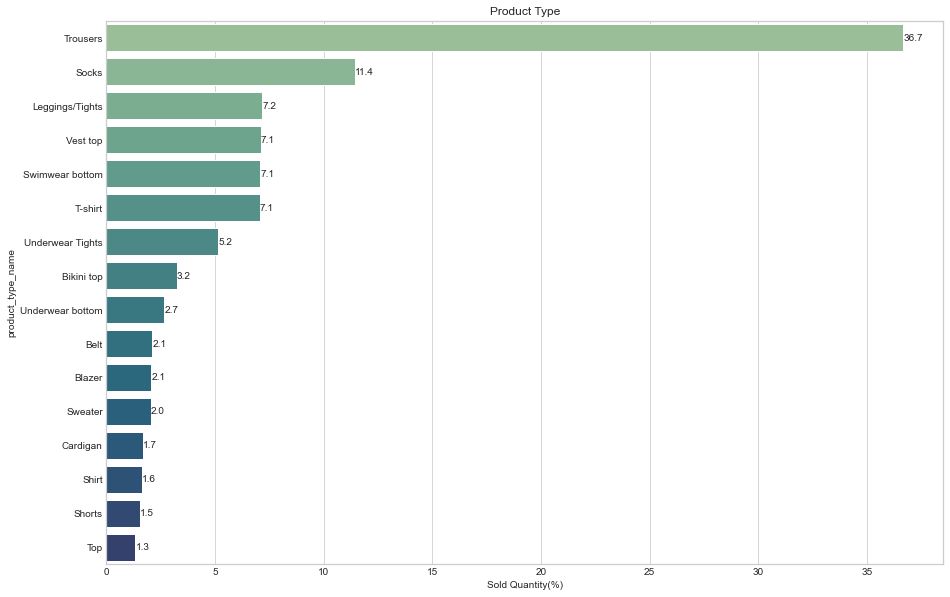

In [19]:
fig,ax = plt.subplots(figsize=(15,10))
b = sns.barplot(y="product_type_name",x="sold_qty(%)",data=top_50_details.groupby("product_type_name")["sold_qty"].sum().transform(lambda x:(x/x.sum()*100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)",ascending=False),palette="crest")
for container in b.containers:
    b.bar_label(container, fmt='%.1f',fontsize=10)
ax.set_xlabel("Sold Quantity(%)")
ax.set_title("Product Type")
plt.show()


37% of sold products are trousers.

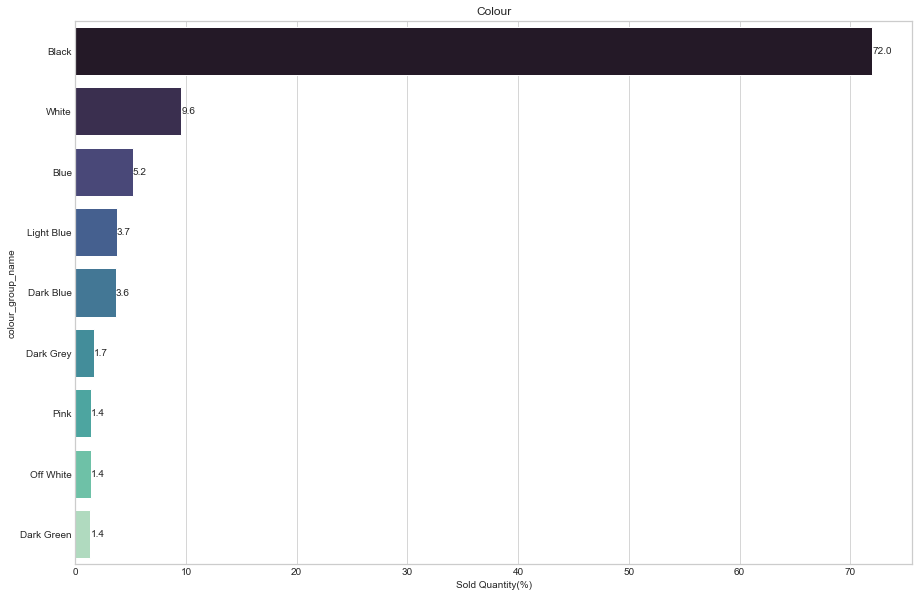

In [20]:
fig,ax = plt.subplots(figsize=(15,10))
b=sns.barplot(y="colour_group_name",x="sold_qty(%)",data=top_50_details.groupby("colour_group_name")["sold_qty"].sum().transform(lambda x:(x/x.sum()*100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)",ascending = False),palette="mako")
for container in b.containers:
    b.bar_label(container, fmt='%.1f',fontsize=10)
ax.set_xlabel("Sold Quantity(%)")
ax.set_title("Colour")
plt.show()

72% of sold products are black colored.

Which are the top50 products that generated most earnings for the company?

In [21]:
df_price = df_tran[['price','article_id']].groupby('article_id').sum().sort_values(by="price",ascending=False)
df_price.rename(columns={'price':'earning'},inplace=True)
df_price = df_price.reset_index()

In [22]:
df_price.head()

,article_id,earning
0,706016001,1631.732102
1,706016002,1136.321085
2,568601006,939.268593
3,448509014,781.478390
4,706016003,692.195915


The most earning by a product is 1631. 

In [23]:
top_50_price=df_price.iloc[:50]

In [24]:
top_50_price_detail = sqldf("""
                                SELECT * 
                                FROM top_50_price AS t
                                INNER JOIN df_article AS a
                                ON t.article_id = a.article_id
                                """)

top_50_price_detail.head()

,article_id,earning,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,1631.732102,706016001,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,1136.321085,706016002,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,568601006,939.268593,568601006,Mariette Blazer,Blazer,Garment Upper body,Black,Ladieswear
3,448509014,781.478390,448509014,Perrie Slim Mom Denim TRS,Trousers,Garment Lower body,Blue,Divided
4,706016003,692.195915,706016003,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Dark Blue,Divided


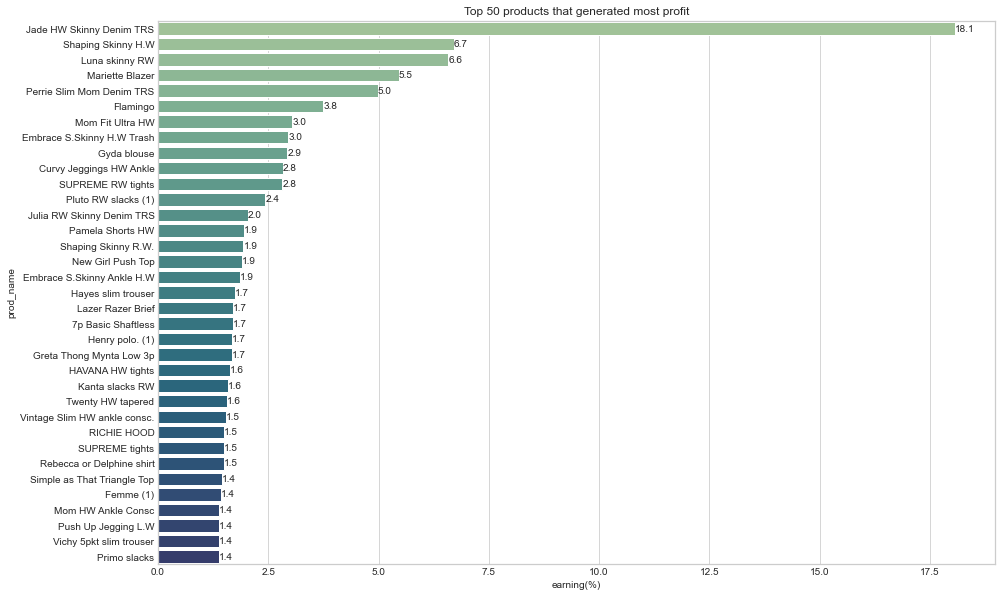

In [25]:
plt.figure(figsize=(15,10))
plt.title("Top 50 products that generated most profit")
b=sns.barplot(y="prod_name",x="earning(%)",data=top_50_price_detail.groupby("prod_name")["earning"].sum().transform(lambda x:(x/x.sum()*100)).rename('earning(%)').reset_index().sort_values(by="earning(%)",ascending=False),palette="crest")
for container in b.containers:
    b.bar_label(container,fmt='%.1f')
plt.show()

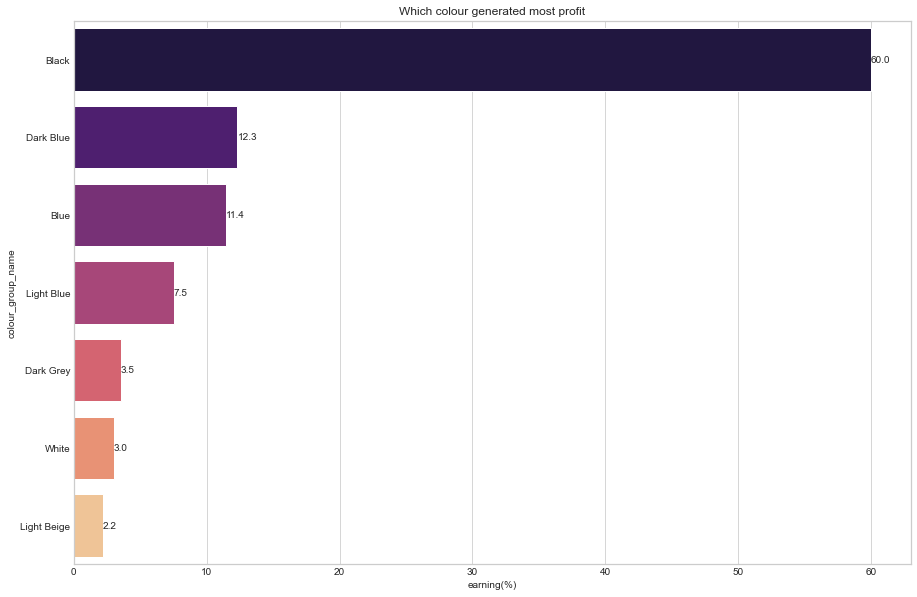

In [26]:
plt.figure(figsize=(15,10))
plt.title("Which colour generated most profit")
b=sns.barplot(y="colour_group_name",x="earning(%)",data=top_50_price_detail.groupby("colour_group_name")["earning"].sum().transform(lambda x:(x/x.sum()*100)).rename('earning(%)').reset_index().sort_values(by="earning(%)",ascending=False),palette="magma")
for container in b.containers:
    b.bar_label(container,fmt='%.1f')
plt.show()

What product category generated least earning for the company?

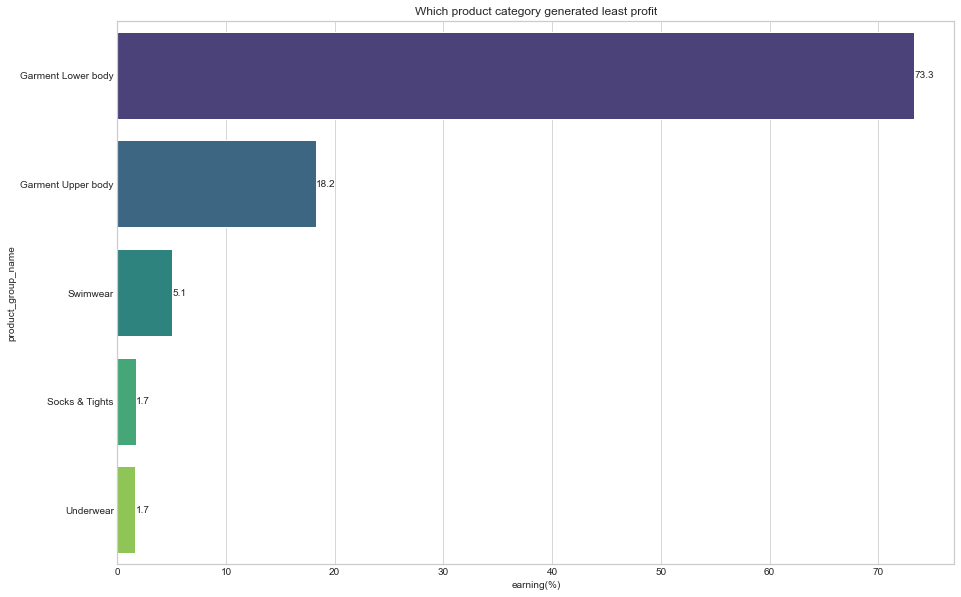

In [27]:
plt.figure(figsize=(15,10))
plt.title("Which product category generated least profit")
b=sns.barplot(y="product_group_name",x="earning(%)",data=top_50_price_detail.groupby("product_group_name")["earning"].sum().transform(lambda x:(x/x.sum()*100)).rename('earning(%)').reset_index().sort_values(by="earning(%)",ascending=False),palette="viridis")
for container in b.containers:
    b.bar_label(container,fmt='%.1f')
plt.show()

Underwear generated the least profit for the company, only 1.7%